In [109]:
# 21M.387 Fundamentals of Music Processing
## Problem Set 3: Fourier Transforms

Instructions, due date, upload to stellar, etc...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *

# %matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)

## Exercise 1

Consider this function:

$x(t) = A \cos(\omega t + \phi)$.  
with the parameters: $A=3$. $\omega=8 \pi$. $\phi= \pi / 4$.

Use numpy to create a signal $x(n)$ that is sampled from the first 4 seconds of $x(t)$ at a sampling rate of $F_s = 100$Hz.


In [3]:
A,w,phi = 3,8*np.pi,np.pi/4
f = lambda t: A*np.cos(w*t + phi)
#Fs samples/sec * 4 sec = total samples
Fs = 100 #Hz
N = 4 * Fs
t = np.linspace(0,4,N,endpoint=False)
x = f(t)
assert(all(abs(x)<=3))
print x[:10]

[ 2.12132034  1.52712425  0.83697332  0.09423228 -0.65442972 -1.3619715
 -1.9839356  -2.48124172 -2.82264231 -2.98668589]


Use matplotlib to make two plots of $x$.

In the first graph plot $x(n)$, where the x-axis shows the sample number $n$. Label the $x$ axis appropriately.  
In the second graph plot $x(t)$. The curve will look the same, but the $x$ axis should show time in seconds. Label the $x$ axis appropriately.

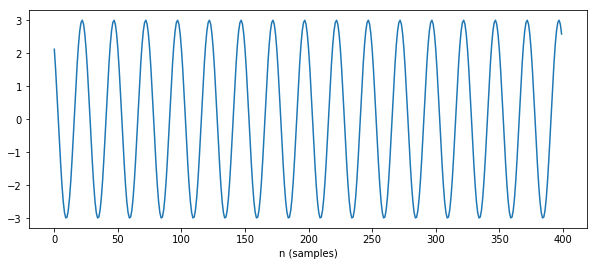

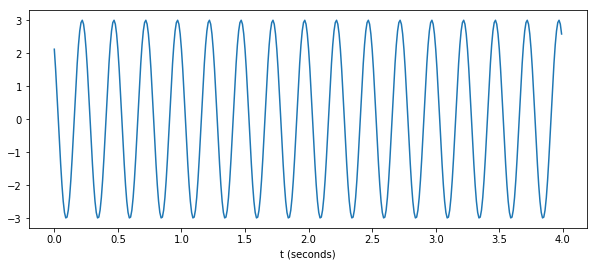

In [4]:
plt.figure()
plt.plot(x)
plt.xlabel('n (samples)')
plt.figure()
plt.plot(np.arange(N)/np.float(Fs),x)
plt.xlabel('t (seconds)')

## Exercise 2

Use numpy's fft function (`np.fft.fft`) to create $X(k)$, the discrete fourier transform of $x(n)$.  
Make two plots of $X(k)$: the magnitude $\lvert X(k) \lvert$ and the phase $\angle X(k)$. For the phase plot to look good, set its values to zero for all points where the magnitude of $X(k)$ is negligible.


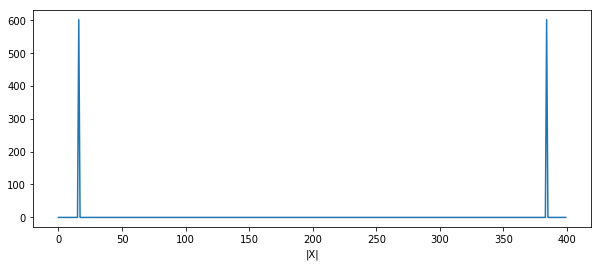

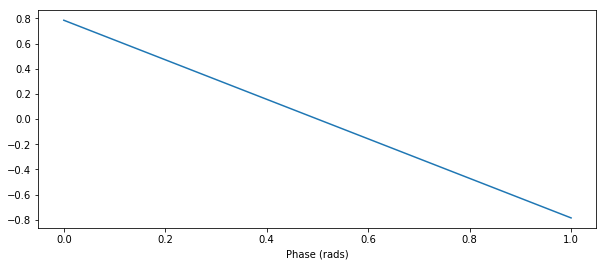

In [5]:
X = np.fft.fft(x)

plt.figure()
plt.plot(abs(X))
plt.xlabel('|X|')

plt.figure()
phase = np.arctan2(np.imag(X),np.real(X))
cleaned_phase = phase[abs(X) > 0.001]
plt.plot(cleaned_phase)
plt.xlabel('Phase (rads)')

a) Describe the symmetry properties of the DFT magnitude and phase plots.  
b) How is the energy of the original signal distributed across the frequency bins in the magnitude plot?

Answer:

a) Mag: symmetric, Phase: antisymmetric about k=N/2

b) All concentrated at k=16 and k=384



a) What is the location, $k$, of the peak of $\lvert X(k) \lvert$ from your plot?

b) Calculate the frequency $f$ that corresponds to this value of $k$. Show your calculations in python below.

In [6]:
a = find_peaks(abs(X))
k_to_f = lambda k: k*Fs/np.float(N) 
b = map(k_to_f, a)
print a,b


[ 16 384] [4.0, 96.0]


## Exercise 3

Reproduce the following two signals, $x_1$ and $x_2$ by observing the given plots and creating the correct sinusoidal functions.  
For each signal, use a sampling rate of $F_s = 100$.  
[Hint, test that you got the signals right by plotting them and comparing to the given graphs below]
![](data/ex3a.png)
![](data/ex3b.png)



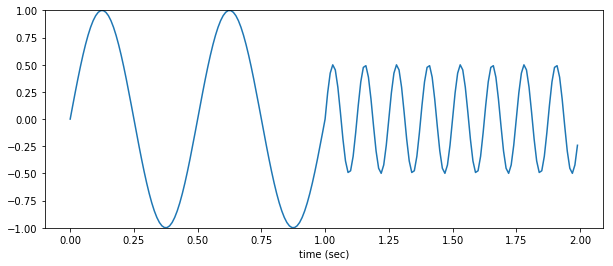

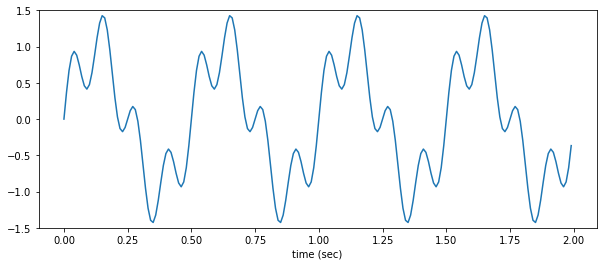

In [7]:
def make_cosine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.cos( 2 * np.pi * k / N * n + ph)

def make_sine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.sin( 2 * np.pi * k / N * n + ph)

N=200

x11 = make_sine(a=1.0, k=2.0, ph=0.0, N=Fs)
x12 = make_sine(a=0.5, k=8.0, ph=0.0, N=Fs)
x1 = np.hstack([x11,x12])
plt.figure()
plt.plot(np.linspace(0,N/np.float(Fs),len(x1),endpoint=False),x1)
plt.ylim(-1, 1)
plt.xlabel('time (sec)')

x21 = make_sine(a=1.0, k=4.0,  ph=0.0, N=2*Fs)
x22 = make_sine(a=0.5, k=16.0, ph=0.0, N=2*Fs)
x2 = x21 + x22
plt.figure()
plt.plot(np.linspace(0,N/np.float(Fs),len(x2),endpoint=False),x2)
plt.ylim(-1.5, 1.5)
plt.xlabel('time (sec)')

#@interact( a=(0.0, 2.0))
#def plot_cosine(a = 1, k = 1, ph = 0) :
#    x21 = make_sine(a=1.5, k=4.0,  ph=0.0, N=Fs)
#    x22 = make_sine(a, k=16.0, ph=0, N=Fs)
#    x2 = x21 + x22
#    plt.figure()
#    plt.plot(x2)
#    plt.show()
    


Now create and plot the magnitude of the DFT for signals $x_1$ and $x_2$. Notice that one plot looks "clean" while the other has "spectral leakage". Why is this the case?

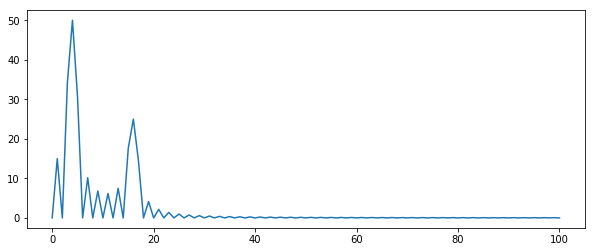

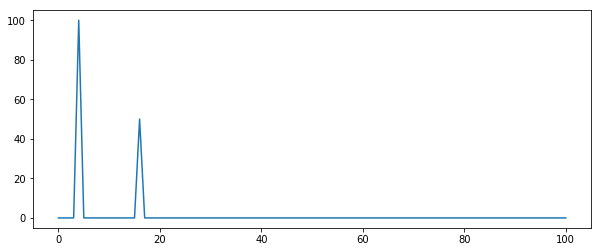

In [8]:
plt.figure()
plt.plot(np.abs(np.fft.rfft(x1)))
plt.figure()
plt.plot(np.abs(np.fft.rfft(x2)))

Answer: 
The second signal is a much cleaner sum of two frequencies, whereas the first signal needs to recruit other frequencies to deaden out the effect of the other other main amplitude. 

Also the joining point of the two sine waves is not completely smooth -- sharpness requires high frequency bands.



## Exercise 4

Note the following discrete-time functions $f_1, f_2, f_3$, and $g_1, g_2, g_3$.  
For each pair $f_n$ and $g_m$ (9 pairs total), compute the similarity measure between the two functions by using the multiply-and-add approach, (the dot product): $\langle f,g\rangle = \sum_{n=0}^{15} f(n)g(n)$.
![](data/ex4a.png)
![](data/ex4b.png)


In [9]:
f1 = 8*[1] + 8*[0]
f2 = 4*[1] + 4*[0] + 4*[1] + 4*[0] 
f3 = 2*[0] + 2*[1] + 4*[-1] + 4*[0] + 4*[1]

g1 = 8*[-1] + 8*[0]
g2 = 4*[0] + 4*[1] + 4*[0] + 4*[-1]
g3 = 2*[0] + 2*[1] + 4*[-1] + 4*[0] + 4*[1]
fs,gs = [f1,f2,f3], [g1,g2,g3]

dot = lambda l1,l2: sum([a*b for (a,b) in zip(l1,l2)])
similarity = np.array([[dot(f,g) for g in gs] for f in fs])

print similarity #row fixes f, column fixes g, in order


[[-8  4 -2]
 [-4  0  2]
 [ 2 -8 10]]


What does it mean when a similarity measurement is:  
a) highly positive?  
b) highly negative?  
c) zero or close to zero?  

Answer:  
a) Energetic, similar signals 

b) Energetic, dissilar signals

c) f1[i]~=0 or f2[i]~=0 for most i


## Exercise 5

The plot below shows the first 50 frequency bins of $\lvert X(k) \lvert$, the magnitude DFT of a signal $x(n)$ which was sampled from $x(t)$ (not shown). $x(t)$ is exactly 1.5 seconds long, and was sampled at a rate of $F_s = 400Hz$.  

- What are the frequencies (in Hz) of the prominent sinusoidal components of $x(t)$?
- What are the amplitudes of these sinusoids?
- Is it possible to compute the phase of $x(t)$ from the given data? If so, what is the phase. If not, why not?

Show your calculations in python.

![](data/ex5.png)


In [10]:
Fs = 400
N = 1.5*Fs #samples
def k_to_f(k): return k*Fs/np.float(N) 
freqs = map(k_to_f, [6,18,30])
amps = [600,1200,300]
absX = 6*[0]+[600]+11*[0]+[1200]+11*[0]+[300]+19*[0]
#phi = np.arctan2(np.imag(X),np.real(X))
#cannot get phi, because we only have abs(X)

## Exercise 6

For the signal $x(n)$ below, you will use 3 different ways to find the magnitude and phase of the frequency index $k=12$. $N=256$ (the length of the $x(n)$). Make sure to execute the code below to load $x$.

N = 256. k = 12.


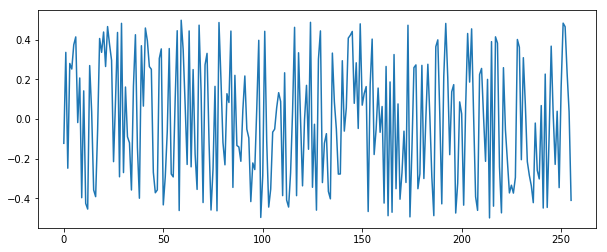

In [11]:
# load x[n]:
x = np.load('data/ex6.npy')
N = len(x)
k = 12
print 'N = %d. k = %d.' % (N, k)
plt.figure()
plt.plot(x);

### Part 1

Create a test sinusoid $s(n) = \cos(2\pi kn/N + \phi)$ with the proper $k$. Take the dot product (ie, find the similarity measure) between this sinusoid and the signal $x.$ Repeat this process for a large number of phase offsets $\phi$ to find the "best fit". Note the maximumum magnitude and phase that created it.

Use the phases array (below) as the phases to test.

In [12]:
# phase quantities to try:
test_phis = np.linspace(0, 2* np.pi, 100, endpoint=False)
n = np.arange(N)
f = lambda i,j: np.cos(2*np.pi*k*n[j]/N + test_phis[i])
sig_by_phi = np.array([[f(i,j) for i in range(len(test_phis))]\
                       for j in range(int(N))])
similarities = np.dot(x,sig_by_phi)
best_phi = test_phis[np.argmax(similarities)]
print "Best Mag, Phi: "+str(max(similarities))+", "+str(best_phi)


@interact(ph=(-PI, PI, PI/50))
def plot_cosine(ph = best_phi) :
    s = np.cos(2*np.pi*k*n/N + ph)
    plt.figure()
    plt.plot(s)
    plt.plot(x)
    print "Plotted mag: "+str(np.dot(s,x))
    plt.ylim(-1, 1)
    plt.figure()
    plt.show()
    #phi = 0.56
    #8.15



Best Mag, Phi: 8.15595263432, 0.565486677646


interactive(children=(FloatSlider(value=0.5654866776461628, description=u'ph', max=3.141592653589793, min=-3.141592653589793, step=0.06283185307179587), Output()), _dom_classes=('widget-interact',))

### Part 2

For this part, use two sinusoids:
- $s_{1k}(n) = \cos(2\pi kn/N)$
- $s_{2k}(n) = -\sin(2\pi kn/N)$  
as the prototype (or probe) functions and derive the magnitude and phase from these results.

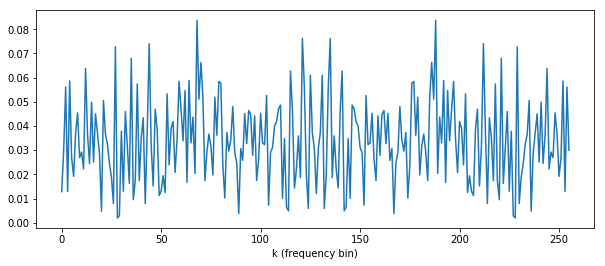

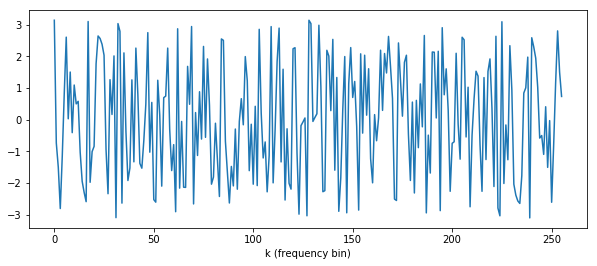

In [13]:

n = np.arange(N)
ks = np.arange(N)
f1 = lambda i,j: np.cos(2*np.pi*ks[i]*n[j]/N)
f2 = lambda i,j: -np.sin(2*np.pi*ks[i]*n[j]/N)
s1_by_k = np.array([[f1(i,j) for i in range(N)]\
                       for j in range(int(N))])
s2_by_k = np.array([[f2(i,j) for i in range(N)]\
                       for j in range(int(N))])

sk_energy = zip(np.dot(x,s1_by_k), np.dot(x,s2_by_k))

A = np.array([(2.0/N)*(sk[0]**2 + sk[1]**2)**(0.5)
                 for sk in sk_energy])
phi = np.array([np.arctan2(sk[1],sk[0]) for sk in sk_energy])

plt.figure()
plt.plot(A)
plt.xlabel('k (frequency bin)')
plt.figure()
plt.plot(phi) #could remove phi w/ low corresponding A if doing more with this signal
plt.xlabel('k (frequency bin)')


### Part 3
Finally, take the DFT of the signal (using np.fft.fft) to find the magnitude and phase at the given frequency index $k$.

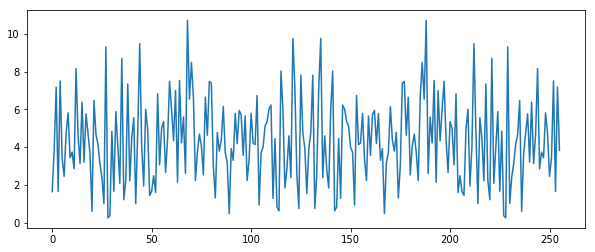

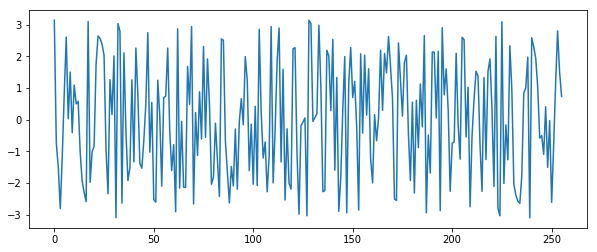

In [14]:
ft = np.fft.fft(x)
plt.figure()
plt.plot(abs(ft))
plt.figure()
plt.plot(np.arctan2(np.imag(ft),np.real(ft)))

## Exercise 7

Observe the following signal $x[n]$.

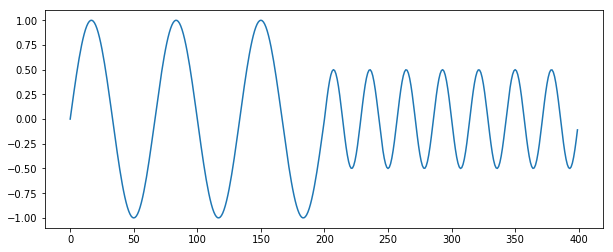

In [15]:
# load x[n]:
x = np.load('data/ex7.npy')
plt.figure()
plt.plot(x);

We will now observe the effect of windowing this signal at different points in time with 2 different windows.

Use a _rectangular_ window of length $N = 200$ positioned at 3 locations: $n = 0$, $n = 100$, $n = 200$. For each windowed signal, plot the magnitude DFT using `np.fft.rfft`. You can use the function `rfft`, which is optimzed for real-valued inputs. This function will return an array of length $(1 + N/2)$, thereby removing the redundant information in the DFT.

Now plot the same 3 plots using a _Hann_ window (`np.hanning`)

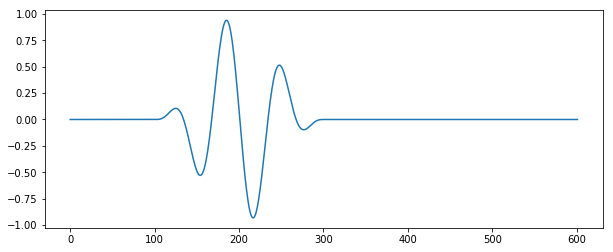

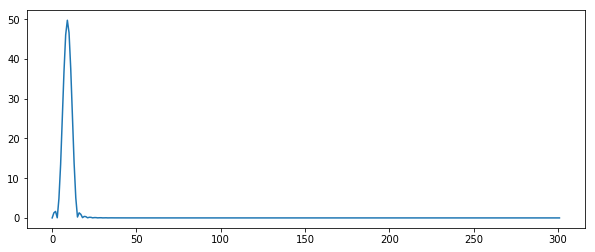

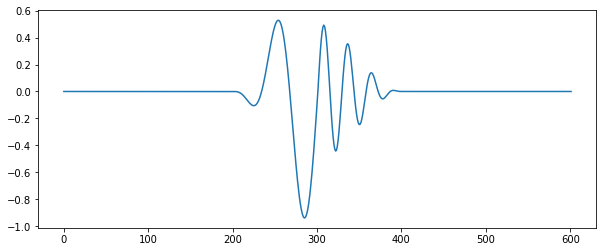

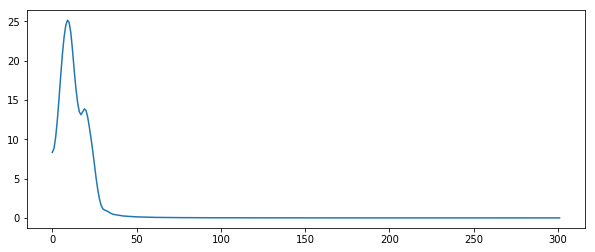

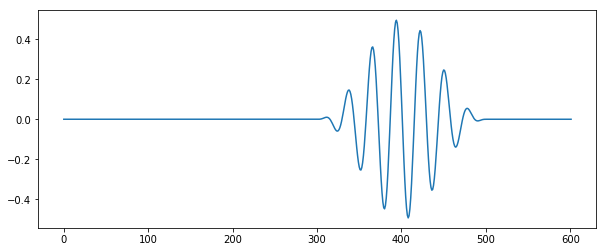

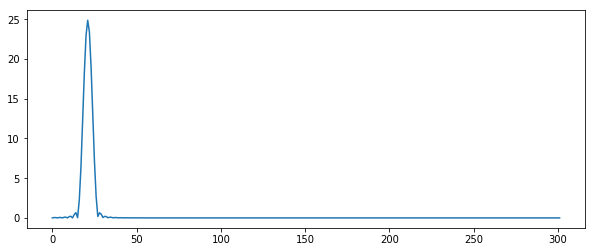

In [16]:
# from fourier2.ipynb
win_len = 200
win_positions = np.array([0,100,200])

def window(x,win_len,win_pos):
    pad_len = int(win_len/2.0) + 1
    pad = np.zeros(pad_len)
    xzp = np.hstack([pad,x,pad])
    start_count = win_pos + pad_len
    end_count = len(xzp)-start_count-win_len
    extended_window = np.hstack([np.zeros(start_count),np.hanning(win_len),np.zeros(end_count)])
    return xzp*extended_window

for win_pos in win_positions:
    windowed = window(x,win_len,win_pos)
    plt.figure()
    plt.plot(windowed)
    plt.figure()
    plt.plot(abs(np.fft.rfft(windowed)))




## Exercise 8

Consider a signal, 2 seconds long, whose Short Term Fourier Transform (STFT) is computed with the following parameter sets:  
1) $F_s = 22050, N = 1024, H = 256$  
2) $F_s = 48000, N = 1024, H = 512$  
3) $F_s = 8000, N = 2048, H = 1024$  

The windowing in this case is _non-centered_ (meaning, we don't zero-pad the beginning of the signal).

For each STFT above, determine:  
a) the frequency resolution of the STFT (in Hertz)  
b) the time resolution of the STFT (in seconds)   
c) the length (ie, the exact number of time samples) in the STFT


In [17]:
# Answers
freq_res = lambda Fs,N,H: Fs/np.float(N)
feature_rate = lambda Fs,N,H: Fs/np.float(H)
num_samples = lambda Fs,N,H: N/np.float(H)

vals1 = 22050,1024,256
vals2 = 48000,1024,512
vals3 = 8000,2048,1024
#1
a1 = freq_res(*vals1) 
b1 = feature_rate(*vals1)
c1 = num_samples(*vals1)
#2
a2 = freq_res(*vals2) 
b2 = feature_rate(*vals2)
c2 = num_samples(*vals2)
#3
a3 = freq_res(*vals3) 
b3 = feature_rate(*vals3)
c3 = num_samples(*vals3)

print a1,b1,c1


21.533203125 86.1328125 4.0


## Exercise 9

Create the Short Term Fourier Transform function below.  

This function takes as input:  
a) the sampled time-domain signal ($x$)  
b) the length of the fft ($N$)  
c) the hop size ($H$)

It returns a matrix of complex numbers of size `(num_bins, num_hops)`.

Use the Hann window for your STFT function (`np.hanning`).  
Make the window a _centered window_ by zero-padding the beginning of $x$ appropriately.  
Use a python `for` loop to iterate over each hop.  

Since the FT of a real signal is symmetric, the STFT should return only the first half of the FT. In other words, `num_bins` should be $(1 + N/2)$.



(11, 49) (11, 49)


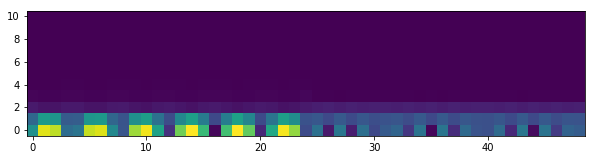

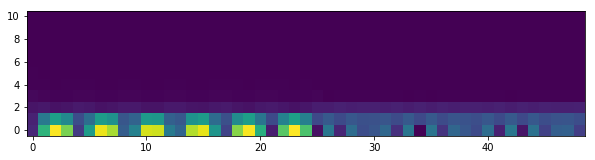

In [18]:
# STFT

#error is confusing N and fft_size

#window length
def stft(snd, fft_size, hop_size):
    #It returns a matrix of complex numbers of size (num_bins, num_hops)
    H = hop_size
    pad = np.zeros(int(H/2.0))
    sndzp = np.hstack([pad,snd,pad])
    M = int((len(sndzp)-fft_size)/H) + 1
    win_positions = range(0,H*M,H) #wrt x
    cols = []
    for win_pos in win_positions:
        windowed = sndzp[win_pos:win_pos+fft_size]*np.hanning(fft_size)
        rfft_window = np.fft.rfft(windowed)
        trans_win = np.transpose([rfft_window])
        cols.append(trans_win)
    return np.hstack(cols)

#figure out the difference between my form and the other one?
import fmp
hop_size = 8
fft_size = 20
a = stft(x,fft_size,hop_size)
b = fmp.stft(x,fft_size,hop_size)

print a.shape, b.shape
assert(a.shape==b.shape)

plt.figure()
plt.imshow(abs(a), origin='lower')
plt.figure()
plt.imshow(abs(b), origin='lower')


## Exercise 10

Load the sound file below into variable `snd`:

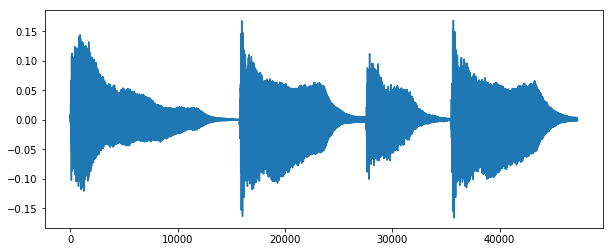

In [19]:
snd = load_wav('audio/piano_tune.wav')
plt.figure()
plt.plot(snd);
fs = 22050.
ipd.Audio(snd, rate = fs)

Next, create the STFT of `snd` using the `stft` function you just made using the values $N = 512$ and $H = 256$. Plot the magnitude of the STFT matrix (the _spectrogram_) using the function `plot_spectrogram(spec)`.

You can use the magic statment:  
`%matplotlib notebook`  
to get an interactive plot, which will allow you to zoom around and find locations of peaks.

Alternatively, you can plot subsections of the Spectrogram.  
For example: `spec[0:50,100:300]` will return a submatrix of `spec` containing the first 50 rows, and columns 100 to 300.

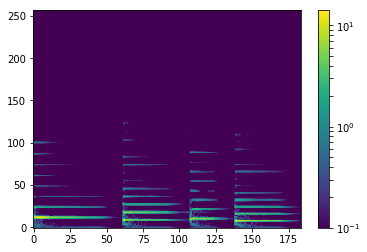

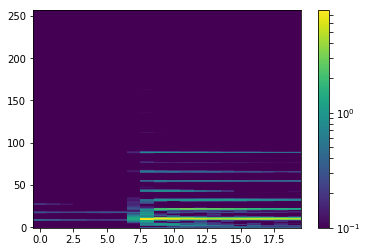

In [44]:
# set values for N (fft_size) and H (hop_size)
fft_size = 512
hop_size = 256
# create the spectrogram
spec = np.abs(stft(snd, fft_size, hop_size))

# plot it
%matplotlib inline

plt.figure()
plot_spectrogram(spec)
plt.figure()
plot_spectrogram(spec[:,100:120])

Using the spectrogram, identify the time step (index value or "hop number") of each note onset.
Convert these values to seconds.

In [48]:
hop_nums = np.diff(np.insert(np.sum(spec,0),0,0)).argsort()[-4:][::-1]
sample_nums = [h*hop_size for h in hop_nums]
secs = [x/fs for x in sample_nums]
print hop_nums
print secs #dist off

[  0  62 139 108]
[0.0, 0.71981859410430837, 1.6137868480725623, 1.2538775510204081]


For each note, find the peak location ($k$) associated with the fundamental frequency - the first major peak.

Convert these $k$s to frequencies.

Convert the frequencies into floating-point MIDI pitch

In [33]:
k_to_freq = lambda k: k*fs/fft_size
hops = [spec[:,i] for i in [int(x) for x in hop_nums]]
ks = [np.argmax(hop) for hop in hops]
freqs = [k_to_freq(k) for k in ks]
midis = [69.0 + 12.0*np.log(f/440.0)/np.log(2.0) for f in freqs]
print ks
print freqs
print midis


[12, 9, 11, 11]
[516.796875, 387.59765625, 473.73046875, 473.73046875]
[71.785125870344899, 66.804675878998779, 70.27875528533859, 70.27875528533859]


The current value of $N$ does not allow you to make a very accurate pitch estimation.

Try different values of $N$ (all powers of 2) until you find a smallest $N$ that lets you accurately identify each note's MIDI pitch to within a 10% tolerance. 

In [50]:
"""
def find_peaks_2(x,proximity):
    peaks = []
    indices_left = set(range(len(x)))
    for _ in range(4):
        if len(indices_left) == 0:
            return peaks
        max_val_i = max(indices_left,key=lambda i:x[i])
        peaks.append(max_val_i)
        too_close = set([i for i in indices_left if abs(max_val_i-i)<proximity])
        indices_left -= too_close
    return peaks
"""

def N_to_midis(N):
    hop_size = int(N/2.0)
    spec = np.abs(fmp.stft(snd, N, hop_size))
    hop_nums = np.diff(np.insert(np.sum(spec,0),0,0)).argsort()[-4:][::-1]
    k_to_freq = lambda k: k*fs/N
    hops = [spec[:,i] for i in [int(x) for x in hop_nums]]
    ks = [np.argmax(hop) for hop in hops]
    freqs = [k_to_freq(k) for k in ks]
    midis = [69.0 + 12.0*np.log(f/440.0)/np.log(2.0) for f in freqs]
    return midis

powers_of_2 = [2**x for x in range(6,10)]
for N in powers_of_2:
    print N_to_midis(N) 
T

[64.765575861691033, 64.765575861691033, 64.765575861691033, 64.765575861691033]
[64.765575861691033, 64.765575861691033, 64.765575861691033, 71.785125870344899]
[64.765575861691033, 64.765575861691033, 71.785125870344899, 68.628713000339374]
[66.804675878998779, 64.765575861691033, 68.628713000339374, 71.785125870344899]
